In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve, root
from scipy.integrate import solve_ivp
import time

44 steps 37.50 ms
88 steps 109.21 ms


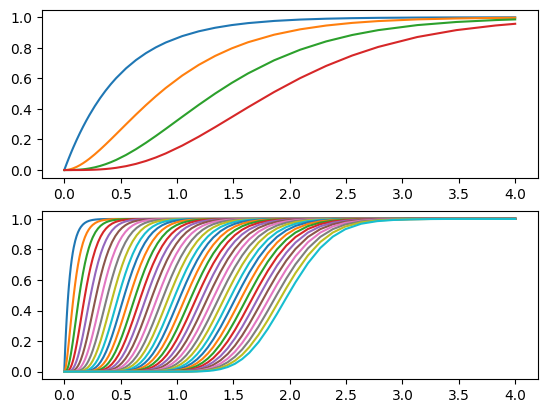

In [10]:
def tankseries(t, c, dd):
    # TWOTANKS is a model of two tank in series describing the concentration variation
    c_before = np.hstack((dd['cin'],c[:-1]))
    #print(f"c: {c}")
    #print(f"cbefore: {c_before}")

    dcdt = dd['q']/dd['Vn']*(c_before - c)
    return dcdt

def generalTankSeries(Vtot,N):
    tspan = [0, 4]
    yinit = np.zeros(N) #Initial values for c1 and c2.

    dd['Vn'] = Vtot/N 
    
    #Simulation
    tic = time.time()
    sol = solve_ivp(lambda t, c: tankseries(t, c, dd), tspan, yinit, method = 'BDF')
    toc = time.time() - tic
    print(f'{len(sol.t)} steps {toc*1000:.2f} ms')
    return sol

# Parameters
dd = {}
dd['q'] = 1.0
dd['cin'] = 1.0

plt.figure(1)

plt.subplot(2,1,1)
sol = generalTankSeries(Vtot=1,N=4)
plt.plot(sol.t,sol.y.T)

plt.subplot(2,1,2)
sol = generalTankSeries(Vtot=1,N=40)
plt.plot(sol.t,sol.y.T)

plt.show(block=False)